# m6A Analysis Part 1
First, read in the gene expression estimates by Kallisto, using `tximport` package.
Then perform clustering analysis using different gene sets.

Pre-requisite:
- Finish running CLAM Snakemake pipeline.
- Get the Gender map based on Y-chrosome genes.

In [1]:
## A few global parameters
SAVE_FIG = TRUE
NUM_GENES = 3000

### Unsupervised Heatmap and Clustering of Gene Expression Levels

In [2]:
library('tximport')
## run in 
## /u/nobackup/yxing/NOBACKUP/frankwoe/CLAM_m6A_Snakemake/projects/Mouse-all/projects/Mouse-all/kallisto
t2g = read.table('../_data/t2g/t2g_mm10.txt', header=T)

kallisto_dir = '../_data/m6A/kallisto'
file.list.name = list.files(kallisto_dir)
file.list = paste(kallisto_dir, file.list.name, 'abundance.tsv', sep='/')


Update the sample names by attaching the gender information to the neonatal samples.
Then read in Kallisto estimates.

If not run gender map yet, [see here](#) for a notebook on the determination of baby sex. 

In [3]:
gender_map = read.table('../_data/m6A/gender_map/gender_map.txt', header=T)
names(file.list) = gender_map$NewID[match(file.list.name, gender_map$OriginalID)]
g = tximport(file.list, type='kallisto',  tx2gene=t2g)
abundance = g$abundance
ensembl_id = rownames(abundance)

data = g$abundance

Note: importing `abundance.h5` is typically faster than `abundance.tsv`
reading in files with read_tsv
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 
transcripts missing from tx2gene: 172
summarizing abundance
summarizing counts
summarizing length


## Upper Quartile Normalization of the expression levels
Because of the huge tissue difference between heart and kidney (specifically, the adult heart samples all have REALLY high mitocondria gene expression), we will need to perform some normalizations of the TPM values that makes them comparable.

A popular yet simple method is Upper Quartile Normalization.

In [4]:
print("BEFORE Norm:")
head(data)
sample.quantileExpressed <-
  apply(data, 2, function(x){quantile(x[x>0], 0.75)})

sample.quantileAll <-
  apply(data, 2, function(x){quantile(x, 0.75)})


#data = t(t(data)/sample.quantileExpressed)
data = t(t(data)/sample.quantileAll)
print("AFTER Norm:")
head(data)
write.table(data, file="_data/tpm_norm.txt", sep='\t')

[1] "BEFORE Norm:"


,F_KI_06,F_KI_07,F_KI_08,F_KI_09,F_KI_10,M_LV_01,M_LV_02,M_LV_03,M_LV_04,M_LV_05,⋯,M_RV_01,M_RV_02,M_RV_03,M_RV_04,M_RV_05,F_RV_06,F_RV_07,F_RV_08,F_RV_09,F_RV_10
ENSMUSG00000000001,43.344200,43.354300,46.6118000,51.541400,42.1756000,9.356090,6.7617100,9.2019800,8.5965900,8.3690600,⋯,9.3189100,9.613040,9.1145500,11.611000,7.2889300,6.8993600,8.2883000,10.5117000,7.3441300,10.135800
ENSMUSG00000000003,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000
ENSMUSG00000000028,3.360940,3.792029,5.5808800,2.695020,2.8018700,1.849642,2.9732870,2.2725550,2.1609800,2.2696919,⋯,1.5945900,1.165487,1.2935900,2.363948,3.8294780,2.8509880,2.9356600,2.5410100,2.6305440,2.256606
ENSMUSG00000000037,0.550862,0.323418,0.2599218,0.490630,0.4303366,0.252858,0.2586731,0.7307414,0.4891212,0.6069782,⋯,0.1409142,0.407154,0.3510674,0.232444,0.8008431,0.3899112,0.2309512,0.2276592,0.6308007,0.613606
ENSMUSG00000000049,0.000000,2.929459,0.6946220,0.737459,0.9583710,0.199846,0.1728220,1.0652000,1.7428600,0.6951890,⋯,0.0000000,0.000000,4.7491700,8.083300,1.7578000,4.7464080,0.8331180,3.8736870,2.1623270,0.000000
ENSMUSG00000000056,25.068300,23.513400,21.6851000,23.805700,25.4519000,31.597400,28.0496000,31.6869000,33.0089000,30.7361000,⋯,31.2991000,28.401300,33.4121000,24.772500,31.3637000,28.8683000,34.0599000,28.8877000,33.3439000,33.886100


[1] "AFTER Norm:"


,F_KI_06,F_KI_07,F_KI_08,F_KI_09,F_KI_10,M_LV_01,M_LV_02,M_LV_03,M_LV_04,M_LV_05,⋯,M_RV_01,M_RV_02,M_RV_03,M_RV_04,M_RV_05,F_RV_06,F_RV_07,F_RV_08,F_RV_09,F_RV_10
ENSMUSG00000000001,1.65588829,1.72967581,1.81917088,2.04230738,1.70094967,0.75320043,0.57732013,0.70160278,0.67803293,0.65440881,⋯,0.71509810,0.69737297,0.66934459,0.91791708,0.58065729,0.50937170,0.63218215,0.76039868,0.55030275,0.72536157
ENSMUSG00000000003,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
ENSMUSG00000000028,0.12839875,0.15128790,0.21781125,0.10678909,0.11299993,0.14890314,0.25386159,0.17327042,0.17044149,0.17747589,⋯,0.12236284,0.08454965,0.09499728,0.18688384,0.30506732,0.21048512,0.22391466,0.18381238,0.19710920,0.16149246
ENSMUSG00000000037,0.02104471,0.01290318,0.01014426,0.01944102,0.01735555,0.02035602,0.02208572,0.05571521,0.03857812,0.04746194,⋯,0.01081323,0.02953677,0.02578131,0.01837605,0.06379748,0.02878669,0.01761558,0.01646848,0.04726651,0.04391229
ENSMUSG00000000049,0.00000000,0.11687455,0.02710979,0.02922152,0.03865128,0.01608835,0.01475568,0.08121592,0.13746340,0.05435949,⋯,0.00000000,0.00000000,0.34876448,0.63903188,0.14003144,0.35042176,0.06354528,0.28021599,0.16202525,0.00000000
ENSMUSG00000000056,0.95768995,0.93809747,0.84632866,0.94329135,1.02647979,2.54370952,2.39489698,2.41596016,2.60348827,2.40337320,⋯,2.40177522,2.06035749,2.45368212,1.95841020,2.49852325,2.13131289,2.59788629,2.08968758,2.49849061,2.42503549


Compute the Coefficient of Variance (CoV) of the gene expression across all samples, and get the top `NUM_GENES` ranked genes to plot the Heatmap.

In [5]:
# NUM_GENES = 3000
# compute the CoV
rowVar = apply(data, 1, function(x) var(x)/mean(x))
y = as.matrix(data[order(-rowVar)[1:NUM_GENES],])
y = t(scale(t(y)))

# use 1-cor as the distance metric between samples
hr = hclust(as.dist(1-cor(t(y), method="spearman")), method="average")
hc = hclust(as.dist(1-cor(y, method="pearson")), method="average")

palette <- colorRampPalette(c("blue","white","red"))
             
## clab: a matrix object for color coding the columns
clab = data.frame(
	ventricle_position = 'white',
	gender = 'white',
	age = sapply(colnames(y), function(x) ifelse(length(grep('N',x)), 'green', 'darkgreen')),
	tissue = sapply(colnames(y), function(x) ifelse(length(grep('KI',x)), 'orange', 'pink')),

	stringsAsFactors=F
	)
clab$gender[ grep('M', colnames(y)) ] = 'blue'
clab$gender[ grep('F', colnames(y)) ] = 'red'
clab$ventricle_position[ grep('RV', colnames(y)) ] = 'steelblue'
clab$ventricle_position[ grep('LV', colnames(y)) ] = 'yellow3'

clab = as.matrix(clab)

breaks = c(seq(-3, 0,length=100),seq(0, 3,length=100))

png 
  2

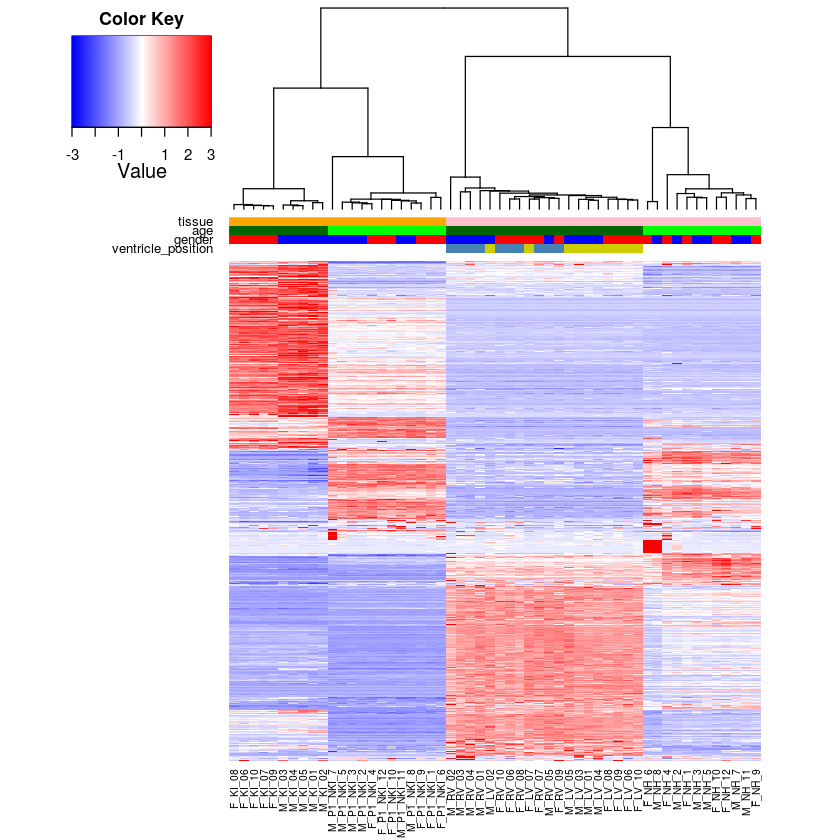

In [6]:
source('scripts/Heatmap.3.R')
heatmap.3(y, Rowv = as.dendrogram(hr), Colv = as.dendrogram(hc), dendrogram = "col", col = palette, 
		  labRow=F, breaks=breaks,
          ColSideColors = clab, key = TRUE)
if(SAVE_FIG) {
    pdf('_data/GeneExp_Heatmap_Top3000CoV.pdf')
    heatmap.3(y, Rowv = as.dendrogram(hr), Colv = as.dendrogram(hc), dendrogram = "col", col = palette, 
		  labRow=F, breaks=breaks,
          ColSideColors = clab, key = TRUE)
    dev.off()
}

## m6A-related Gene Clustering

We could also add a list of house-keeping genes as a baseline control; but the caveat being the clustering results are confounded by these housekeeping genes.

png 
  2

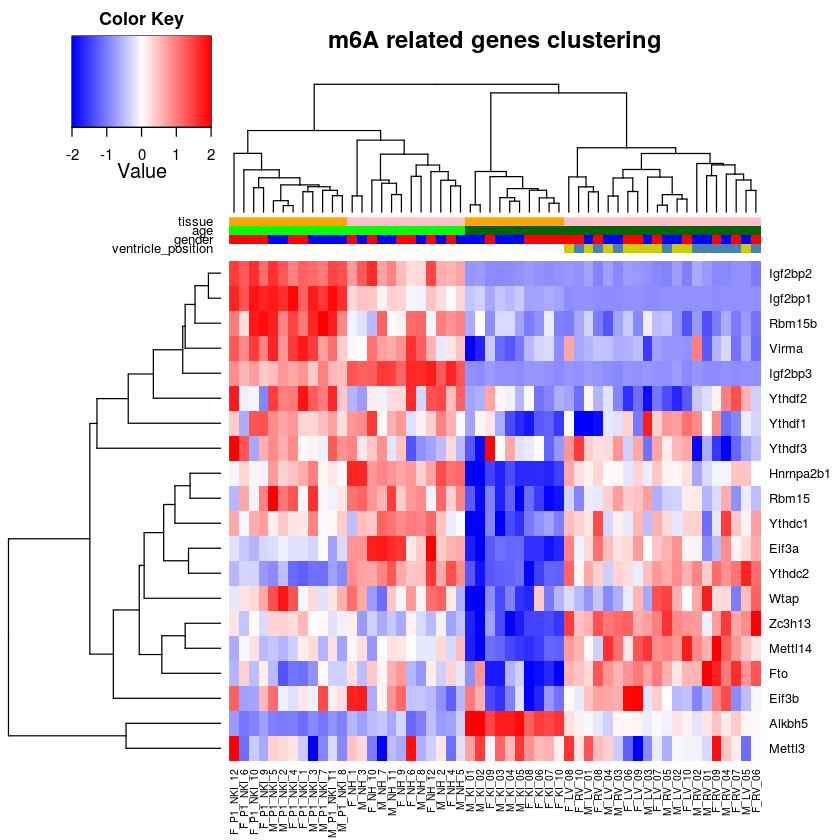

png 
  2

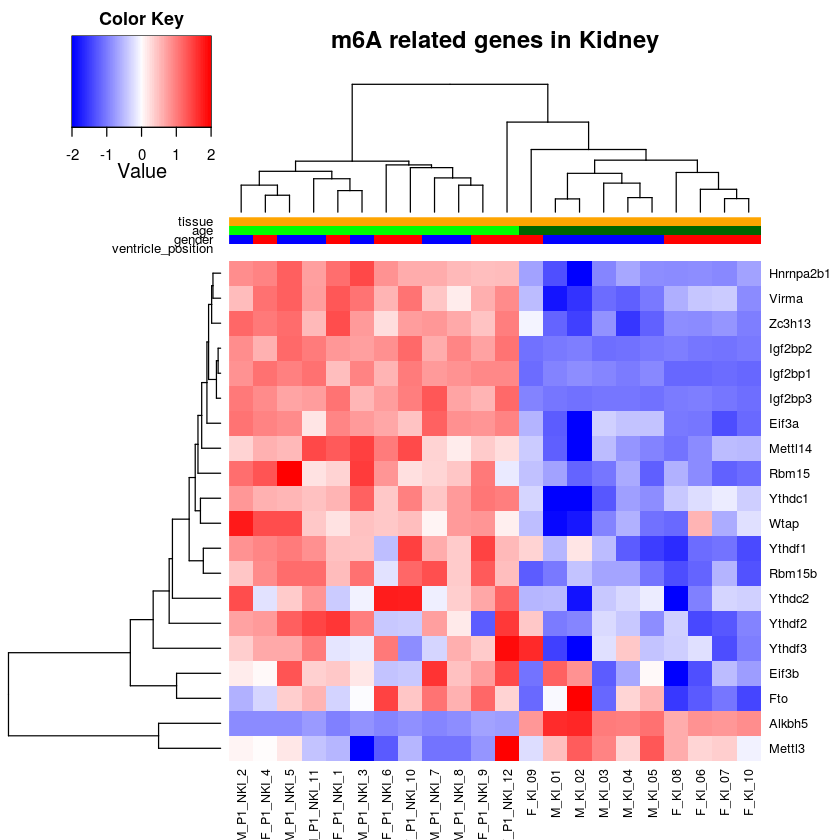

png 
  2

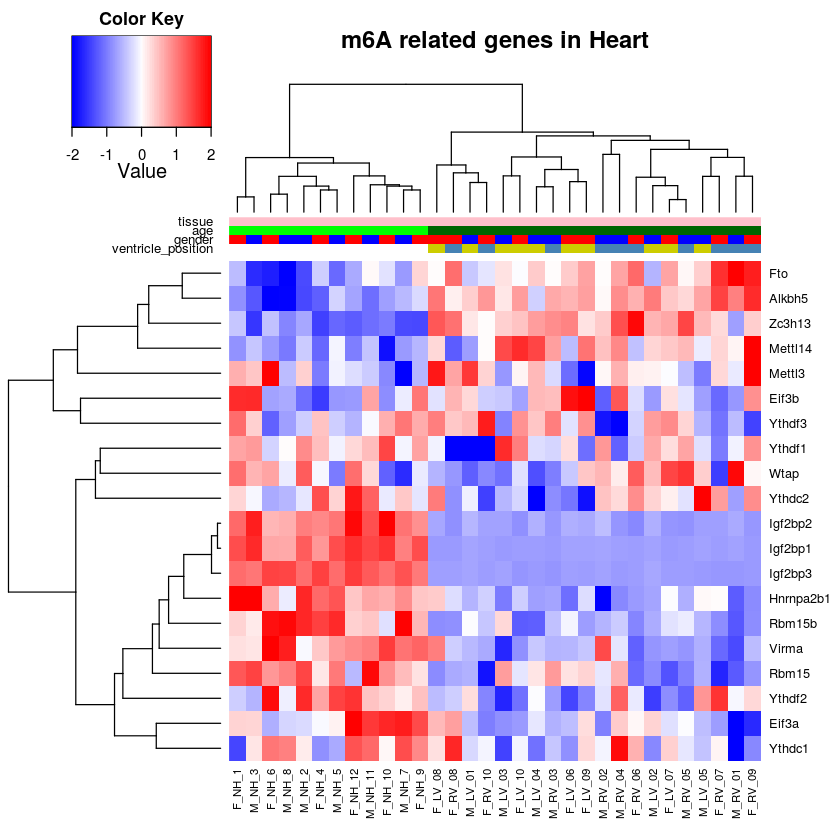

In [7]:
# use gene symbols
ref_id = match(ensembl_id, t2g$ensembl_gene_id)
ref_id = t2g$external_gene_name[ref_id]
ref_id = as.character(ref_id)

plot_m6AGene_heatmap = function(m6a_gene, data, save_fn=NULL, sample_idx_to_plot=NULL, main="")
{
    a=match(m6a_gene, ref_id, nomatch=0)
    if(!is.null(sample_idx_to_plot)) {b=sample_idx_to_plot} else { b=1:ncol(data)}
    # y0: m6A subset of gene expression levels
    y0 = as.matrix(data[a,b])
    y0 = t(scale(t(y0)))

    # Actually using pearson correlation looks fine.
    hr0 = hclust(as.dist(1-cor(t(y0), method="pearson")), method="average")
    hc0 = hclust(as.dist(1-cor(y0, method="pearson")), method="average")

    # Clustering using Euclidean distance because
    # correlation on a few data points is not
    # stable.
    #hr0 = hclust(dist(y0), method="average")
    #hc0 = hclust(dist(t(y0)), method="average")

    breaks = c(seq(-2, 0,length=100),seq(0, 2,length=100))
    heatmap.3(y0, Rowv = as.dendrogram(hr0), Colv = as.dendrogram(hc0), dendrogram = "both", col = palette, 
              labRow=m6a_gene, breaks=breaks,
              ColSideColors = clab[b,], key = TRUE,
              main=main)
    if(SAVE_FIG && !is.null(save_fn)) {
        pdf(save_fn)
        heatmap.3(y0, Rowv = as.dendrogram(hr0), Colv = as.dendrogram(hc0), dendrogram = "both", col = palette, 
              labRow=m6a_gene, breaks=breaks,
              ColSideColors = clab[b,], key = TRUE,
              main=main)
        dev.off()    
    }
}


# a list of m6A related genes
m6a_gene = c(
	# writers
	'Mettl3', 'Mettl14', 'Wtap', 'Virma','Rbm15','Rbm15b', 'Zc3h13', # 'Kiaa1429' is Virma
	# erasers
	'Alkbh5', 'Fto',
	# readers
	'Ythdc1','Ythdc2','Ythdf1','Ythdf2','Ythdf3','Hnrnpa2b1','Eif3a','Eif3b','Igf2bp1','Igf2bp2','Igf2bp3'#,
    # house-keeping genes
    #'Hprt', 'Hmbs', 'Alas1', 'Tfrc', 'B2m', 'Ywhaz', 'Ppia', 'Gapdh', 'Rpl13a', 'Actb'
)

plot_m6AGene_heatmap(m6a_gene, data, main="m6A related genes clustering",
                    save_fn="_data/m6A_related_genes.pdf")
plot_m6AGene_heatmap(m6a_gene, data, sample_idx_to_plot=which(clab[,'tissue']=="orange"), 
                     main="m6A related genes in Kidney",
                    save_fn="_data/m6A_related_genes.Kidney.pdf") ## Kidney
plot_m6AGene_heatmap(m6a_gene, data, sample_idx_to_plot=which(clab[,'tissue']=="pink"),
                     main="m6A related genes in Heart",
                    save_fn="_data/m6A_related_genes.Heart.pdf") ## Heart

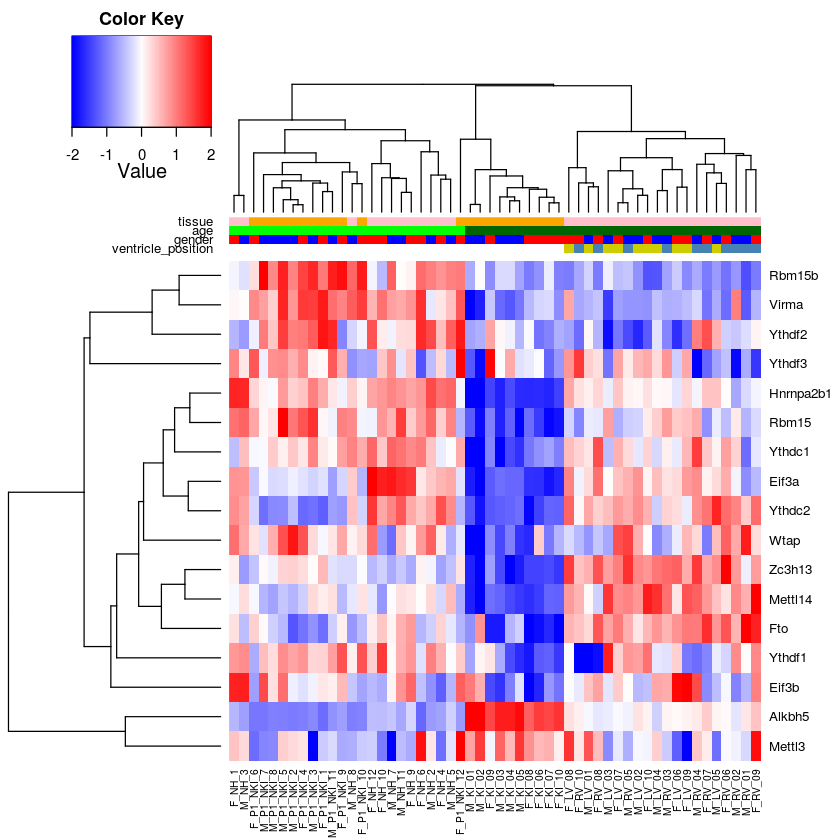

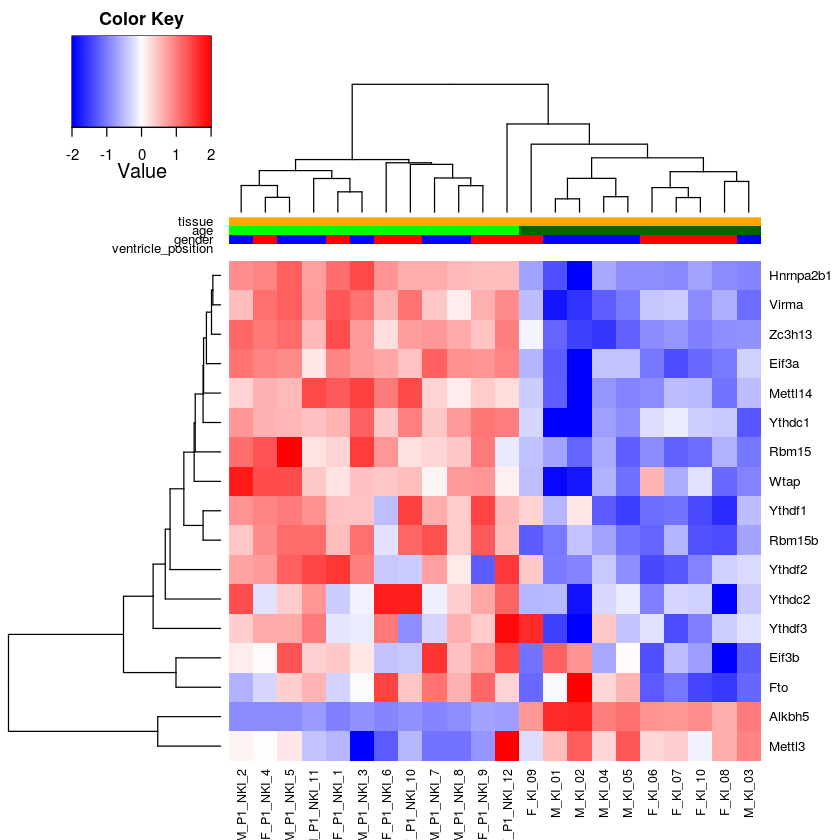

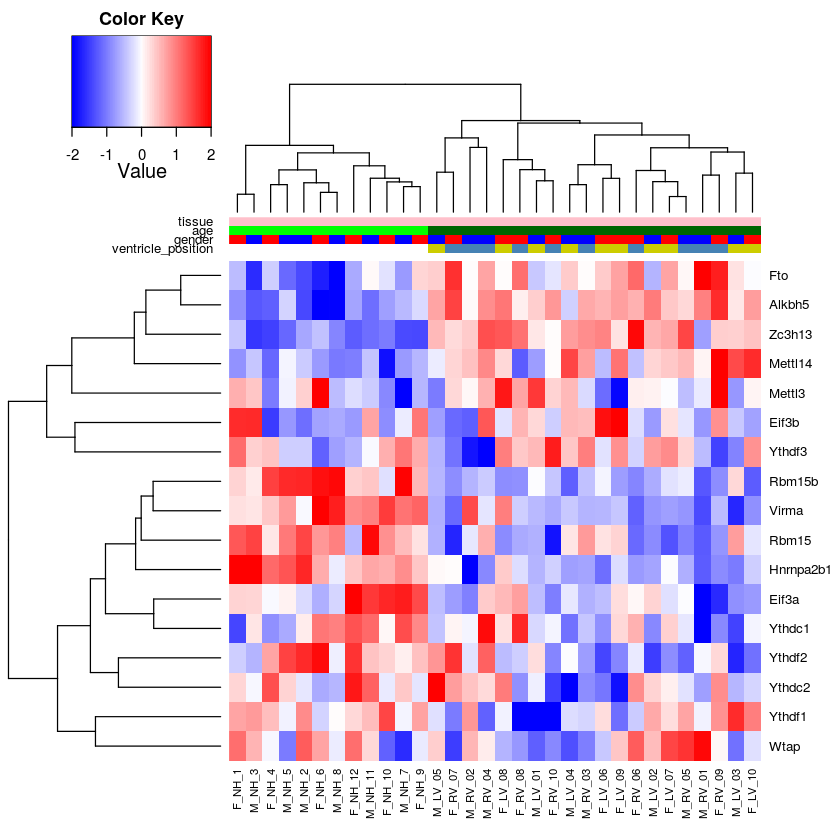

In [8]:
## It looks like the Igf2bp genes are driving the clustering; 
## remove them and re-cluster

# a list of m6A related genes
m6a_gene_2 = c(
	# writers
	'Mettl3', 'Mettl14', 'Wtap', 'Virma','Rbm15','Rbm15b', 'Zc3h13', # 'Kiaa1429' is Virma
	# erasers
	'Alkbh5', 'Fto',
	# readers
	'Ythdc1','Ythdc2','Ythdf1','Ythdf2','Ythdf3','Hnrnpa2b1','Eif3a','Eif3b'#,'Igf2bp1','Igf2bp2','Igf2bp3'#,
    # house-keeping genes
    #'Hprt', 'Hmbs', 'Alas1', 'Tfrc', 'B2m', 'Ywhaz', 'Ppia', 'Gapdh', 'Rpl13a', 'Actb'
)

plot_m6AGene_heatmap(m6a_gene_2, data)
plot_m6AGene_heatmap(m6a_gene_2, data, sample_idx_to_plot=which(clab[,'tissue']=="orange") ) ## Kidney
plot_m6AGene_heatmap(m6a_gene_2, data, sample_idx_to_plot=which(clab[,'tissue']=="pink") ) ## Heart

## All Gene Clustering

We cluster all genes as long as they are not lowly-expressed in all samples; i.e. maximum TPM>10.

This is to eliminate the potential systematic bias in gene expression estimation.

In [9]:
rowMax = apply(data, 1, function(x) max(x))
y1 = as.matrix(data[-which(rowMax<10),])
y1 = t(scale(t(y1)))
print(dim(y1))
# use 1-cor as the distance metric between samples
hr1 = hclust(as.dist(1-cor(t(y1), method="pearson")), method="average")
hc1 = hclust(as.dist(1-cor(y1, method="pearson")), method="average")

[1] 1236   54


png 
  2

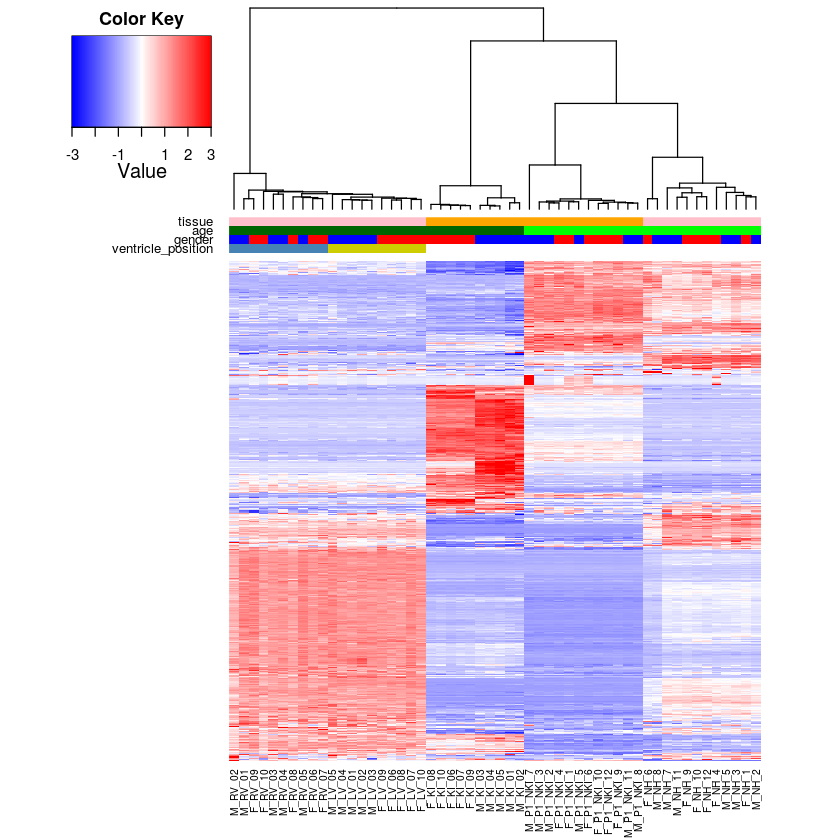

In [10]:
source('scripts/Heatmap.3.R')
heatmap.3(y1, Rowv = as.dendrogram(hr1), Colv = as.dendrogram(hc1), dendrogram = "col", col = palette, 
		  labRow=F, breaks=breaks,
          ColSideColors = clab, key = TRUE)
if(SAVE_FIG) {
    pdf('_data/GeneExp_AllExpressed_Heatmap.pdf')
    heatmap.3(y1, Rowv = as.dendrogram(hr1), Colv = as.dendrogram(hc1), dendrogram = "col", col = palette, 
		  labRow=F, breaks=breaks,
          ColSideColors = clab, key = TRUE)
    dev.off()
}

## Differential Gene Expression Analysis with DESeq2

We utilize the DESeq2 parser `run_DESeq2.R` from `DARTS_RNASeq_Snakemake_pipeline`. 
This is a wrapped-up script for calling `DESeq2`.

In [11]:
## first run Adult Heart vs Neonatal Heart comparison
sample1 = "degdata/Adult_Heart_samples.txt"
sample2 = "degdata/Neonatal_Heart_samples.txt"
output = "../_data/m6A/deseq/Heart_Age.txt"
genome = "mm10"
t2g = "../_data/t2g/t2g_mm10.txt"

cmd = paste("Rscript scripts/run_DESeq2.R", sample1, sample2, output, genome, t2g)
print(cmd)
system2(cmd)

[1] "Rscript scripts/run_DESeq2.R degdata/Adult_Heart_samples.txt degdata/Neonatal_Heart_samples.txt ../_data/m6A/deseq/Heart_Age.txt mm10 ../_data/t2g/t2g_mm10.txt"


In [12]:
## then run Adult Heart vs Neonatal Kideny comparison
sample1 = "degdata/Adult_Kidney_samples.txt"
sample2 = "degdata/Neonatal_Kidney_samples.txt"
output = "../_data/m6A/deseq/Kidney_Age.txt"
genome = "mm10"
t2g = "../_data/t2g/t2g_mm10.txt"

cmd = paste("Rscript scripts/run_DESeq2.R", sample1, sample2, output, genome, t2g)
print(cmd)
system2(cmd)

[1] "Rscript scripts/run_DESeq2.R degdata/Adult_Kidney_samples.txt degdata/Neonatal_Kidney_samples.txt ../_data/m6A/deseq/Kidney_Age.txt mm10 ../_data/t2g/t2g_mm10.txt"


In [13]:
## run Adult Heart vs Adult Kidney comparison
sample1 = "degdata/Adult_Heart_samples.txt"
sample2 = "degdata/Adult_Kidney_samples.txt"
output = "../_data/m6A/deseq/AHK.txt"
genome = "mm10"
t2g = "../_data/t2g/t2g_mm10.txt"

cmd = paste("Rscript scripts/run_DESeq2.R", sample1, sample2, output, genome, t2g)
print(cmd)
system2(cmd)

[1] "Rscript scripts/run_DESeq2.R degdata/Adult_Heart_samples.txt degdata/Adult_Kidney_samples.txt ../_data/m6A/deseq/AHK.txt mm10 ../_data/t2g/t2g_mm10.txt"


In [14]:
## run Neonatal Heart vs Neonatal Kidney comparison
sample1 = "degdata/Neonatal_Heart_samples.txt"
sample2 = "degdata/Neonatal_Kidney_samples.txt"
output = "../_data/m6A/deseq/NHK.txt"
genome = "mm10"
t2g = "../_data/t2g/t2g_mm10.txt"

cmd = paste("Rscript scripts/run_DESeq2.R", sample1, sample2, output, genome, t2g)
print(cmd)
system2(cmd)

[1] "Rscript scripts/run_DESeq2.R degdata/Neonatal_Heart_samples.txt degdata/Neonatal_Kidney_samples.txt ../_data/m6A/deseq/NHK.txt mm10 ../_data/t2g/t2g_mm10.txt"


## Venn Diagram for Differentially expressed genes

In [15]:
deg_heart = read.table('../_data/m6A/deseq/Heart_Age.txt', header=T)
deg_kidney = read.table('../_data/m6A/deseq/Kidney_Age.txt', header=T)
head(deg_heart)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,ext_gene
ENSMUSG00000000001,190.64610729,-0.8302376,0.07508013,-11.0580206,2.004727e-28,1.253122e-27,Gnai3
ENSMUSG00000000003,0.03583438,0.5720478,3.07169200,0.1862322,8.522627e-01,NA,Pbsn
ENSMUSG00000000028,38.82317495,-1.6155101,0.15807275,-10.2200416,1.612716e-24,9.051302e-24,Cdc45
ENSMUSG00000000037,21.00793704,-2.3524912,0.17476919,-13.4605600,2.668858e-41,2.274415e-40,Scml2
ENSMUSG00000000049,7.21021133,1.0293344,0.60383290,1.7046676,8.825643e-02,1.295368e-01,Apoh
ENSMUSG00000000056,584.66037201,0.8950918,0.05459773,16.3943039,2.100327e-60,2.547582e-59,Narf


png 
  2

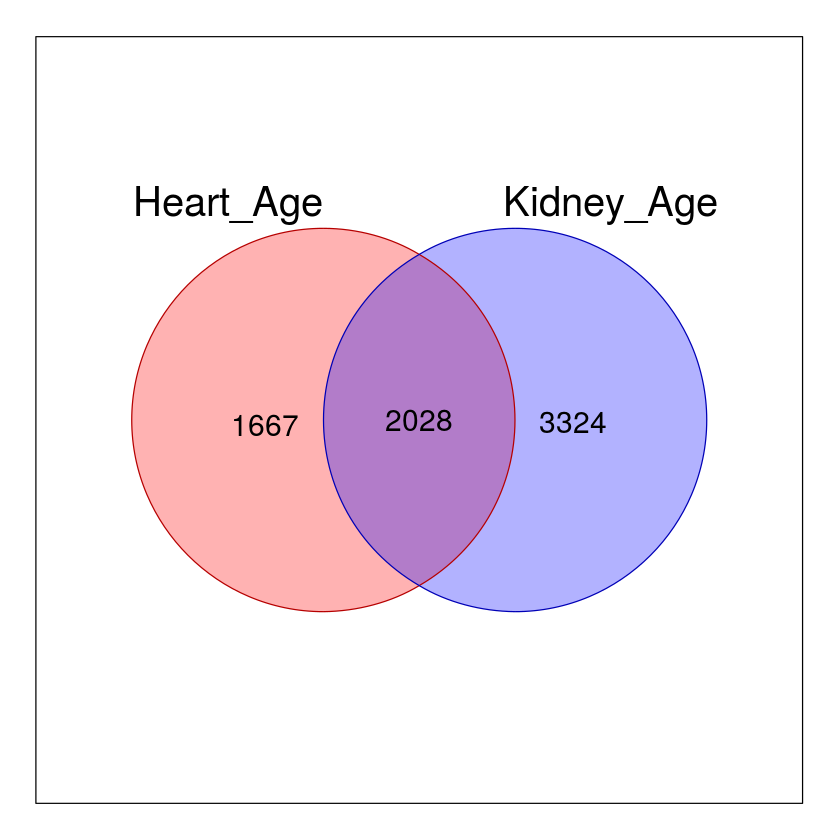

In [16]:
library(venn)
record = list(
    Heart_Age = deg_heart$ext_gene[which(deg_heart$padj<0.01 & abs(deg_heart$log2FoldChange)>1)],
    Kidney_Age = deg_kidney$ext_gene[which(deg_kidney$padj<0.01 & abs(deg_kidney$log2FoldChange)>1)]
)
venn(record, ilab=T, zcolor='style', cexil=1.5, cexsn=2, ecllipse=T)
pdf('_data/Age_DiffExpr.venn.pdf')
venn(record, ilab=T, zcolor='style', cexil=1.5, cexsn=2, ecllipse=T)
dev.off()

png 
  2

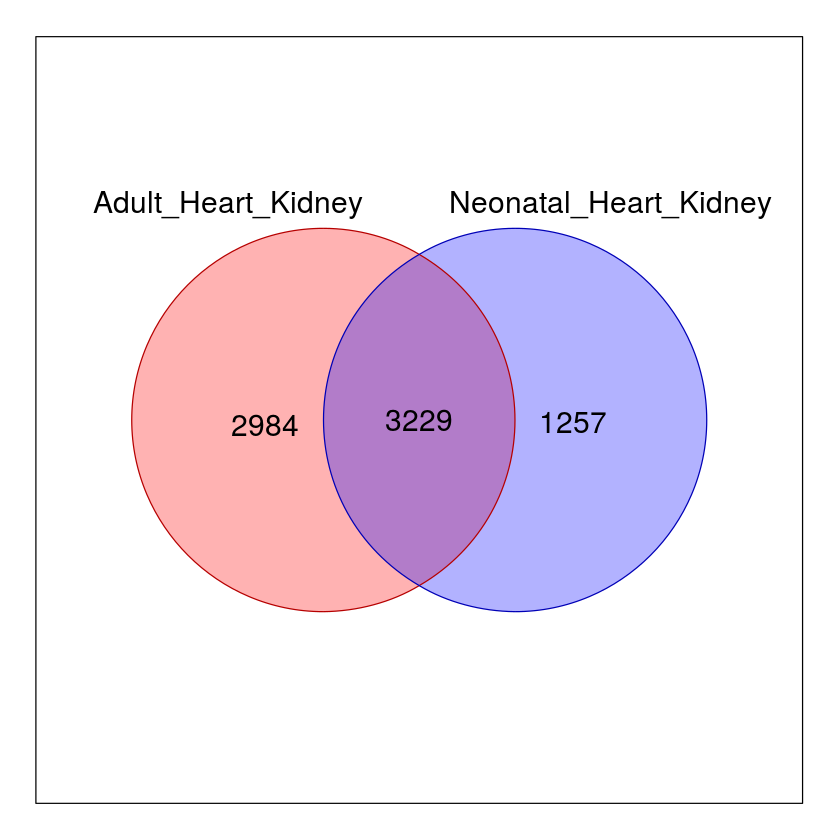

In [17]:
deg_ahk = read.table('../_data/m6A/deseq/AHK.txt', header=T)
deg_nhk = read.table('../_data/m6A/deseq/NHK.txt', header=T)

library(venn)
record = list(
    Adult_Heart_Kidney = deg_ahk$ext_gene[which(deg_ahk$padj<0.01 & abs(deg_ahk$log2FoldChange)>1)],
    Neonatal_Heart_Kidney = deg_nhk$ext_gene[which(deg_nhk$padj<0.01 & abs(deg_nhk$log2FoldChange)>1)]
)
venn(record, ilab=T, zcolor='style', cexil=1.5, cexsn=1.5, ecllipse=T)
pdf('_data/Tissue_DiffExpr.venn.pdf')
venn(record, ilab=T, zcolor='style', cexil=1.5, cexsn=1.5, ecllipse=T)
dev.off()